<a href="https://colab.research.google.com/github/latte05/ML_training/blob/master/Digit_Recognition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

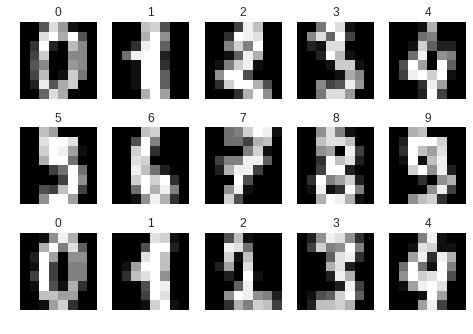

In [15]:
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
digits = datasets.load_digits()

for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.axis("off")
  plt.title(str(digits.target[i]))
  plt.imshow(digits.images[i], cmap="gray")
  
  
plt.show()

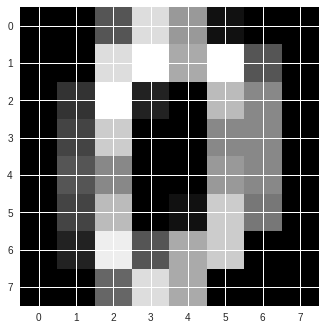

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [16]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

#import data
digits = datasets.load_digits()
x = digits.images
y = digits.target

# reshape to one dimentional data
x = x.reshape((-1,64))

# split data to test = 0.2 train = 0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# learning
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

#check accuracy
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9416666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# save the data
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

clf = joblib.load('digits.pkl')

In [0]:
#Free Paint Soft
# http://firealpaca.com/ja

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving my4.png to my4.png
User uploaded file "my4.png" with length 926 bytes


In [0]:

def predict_digit(filename):
  clf = joblib.load("digits.pkl")
  my_img = cv2.imread(filename)
  
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
  my_img = cv2.resize(my_img, (8,8))
  my_img = 15 - my_img // 16 #flip white to black 
  my_img = my_img.reshape((-1, 64))
  res = clf.predict(my_img)
  return res[0]

In [30]:
n = predict_digit(fn)
print("filename:", fn)
print("prediction=", str(n))

filename: my4.png
prediction= 4


In [24]:

n = predict_digit("my2.png")
print("my2.png prediction = " + str(n))
n = predict_digit("my4.png")
print("my4.png prediction = " + str(n))

my2.png prediction = 3
my4.png prediction = 4
